In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practice
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
#pip install numpy --upgrade

In [13]:
total_all=pd.read_csv("total.csv")

In [15]:
total_all

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,0.894,0.7910,2,-4.699,1,0.1120,0.0183,0.000000,0.0388,0.5830,105.018,audio_features,5rb9QrpfcKFHM1EUbSIurX,spotify:track:5rb9QrpfcKFHM1EUbSIurX,https://api.spotify.com/v1/tracks/5rb9QrpfcKFH...,https://api.spotify.com/v1/audio-analysis/5rb9...,250373,4
1,1,0.851,0.8060,4,-4.620,1,0.0787,0.1180,0.000002,0.1210,0.7870,118.999,audio_features,1QV6tiMFM6fSOKOGLMHYYg,spotify:track:1QV6tiMFM6fSOKOGLMHYYg,https://api.spotify.com/v1/tracks/1QV6tiMFM6fS...,https://api.spotify.com/v1/audio-analysis/1QV6...,237200,4
2,2,0.778,0.8240,10,-5.892,0,0.0707,0.2840,0.000000,0.4050,0.7580,100.024,audio_features,3ZFTkvIE7kyPt6Nu3PEa7V,spotify:track:3ZFTkvIE7kyPt6Nu3PEa7V,https://api.spotify.com/v1/tracks/3ZFTkvIE7kyP...,https://api.spotify.com/v1/audio-analysis/3ZFT...,218093,4
3,3,0.872,0.8720,1,-6.328,1,0.1390,0.0476,0.001120,0.0543,0.8090,116.948,audio_features,2aI21FnmY7TJVKeMaoQZ0t,spotify:track:2aI21FnmY7TJVKeMaoQZ0t,https://api.spotify.com/v1/tracks/2aI21FnmY7TJ...,https://api.spotify.com/v1/audio-analysis/2aI2...,223080,4
4,4,0.762,0.7480,0,-4.150,0,0.0330,0.0266,0.000000,0.3480,0.8510,110.009,audio_features,6St9lR6dhV2tpCNVz7qfrS,spotify:track:6St9lR6dhV2tpCNVz7qfrS,https://api.spotify.com/v1/tracks/6St9lR6dhV2t...,https://api.spotify.com/v1/audio-analysis/6St9...,199027,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,1197,0.190,0.0478,1,-20.941,1,0.0460,0.9810,0.846000,0.1060,0.0803,68.600,audio_features,1MibzP0dzMkIKBp8MO14oN,spotify:track:1MibzP0dzMkIKBp8MO14oN,https://api.spotify.com/v1/tracks/1MibzP0dzMkI...,https://api.spotify.com/v1/audio-analysis/1Mib...,274347,3
1198,1198,0.174,0.1810,8,-15.679,1,0.0385,0.9890,0.009070,0.1050,0.0443,153.807,audio_features,4IRBAonqM9Gq1QyPuXyzRy,spotify:track:4IRBAonqM9Gq1QyPuXyzRy,https://api.spotify.com/v1/tracks/4IRBAonqM9Gq...,https://api.spotify.com/v1/audio-analysis/4IRB...,284000,3
1199,1199,0.394,0.3070,5,-18.869,1,0.0330,0.5590,0.738000,0.2200,0.4350,71.408,audio_features,4IDrd1fYOcAOyZ97eKsXYS,spotify:track:4IDrd1fYOcAOyZ97eKsXYS,https://api.spotify.com/v1/tracks/4IDrd1fYOcAO...,https://api.spotify.com/v1/audio-analysis/4IDr...,304680,3
1200,1200,0.438,0.1290,4,-17.110,1,0.0452,0.9650,0.797000,0.1710,0.8120,159.840,audio_features,2biF10SZJa8ytycndS2l4N,spotify:track:2biF10SZJa8ytycndS2l4N,https://api.spotify.com/v1/tracks/2biF10SZJa8y...,https://api.spotify.com/v1/audio-analysis/2biF...,126840,4


In [73]:
total=total_all[["energy", "loudness", "acousticness", "tempo"]]

In [74]:
X=total

In [75]:
X

,energy,loudness,acousticness,tempo
0,0.7910,-4.699,0.0183,105.018
1,0.8060,-4.620,0.1180,118.999
2,0.8240,-5.892,0.2840,100.024
3,0.8720,-6.328,0.0476,116.948
4,0.7480,-4.150,0.0266,110.009
...,...,...,...,...
1197,0.0478,-20.941,0.9810,68.600
1198,0.1810,-15.679,0.9890,153.807
1199,0.3070,-18.869,0.5590,71.408
1200,0.1290,-17.110,0.9650,159.840


In [76]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
#display(X.head())
print()
display(X_scaled_df.head())

,energy,loudness,acousticness,tempo
0,0.456889,0.493597,-0.667772,-0.588711
1,0.526558,0.510832,-0.312957,-0.051678
2,0.610159,0.233332,0.277808,-0.780539
3,0.833098,0.138214,-0.563498,-0.130460
4,0.257174,0.613367,-0.638234,-0.396999


In [28]:
kmeans = KMeans(n_clusters=5, random_state=1234)
kmeans.fit(X_scaled_df)

KMeans(n_clusters=5, random_state=1234)

In [30]:
labels = kmeans.labels_
labels

array([3, 4, 3, ..., 0, 0, 0])

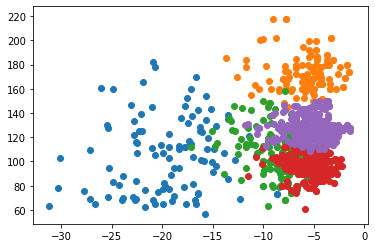

In [31]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    plt.scatter(X.to_numpy()[row_ix, 1], X.to_numpy()[row_ix, 3])
    # show the plot
plt.show()

In [32]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    105
1    132
2    162
3    270
4    533
dtype: int64

In [33]:
#X_df = pd.DataFrame(X)
X["cluster"] = clusters
X

C:\Users\agata\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,energy,loudness,acousticness,tempo,cluster
0,0.7910,-4.699,0.0183,105.018,3
1,0.8060,-4.620,0.1180,118.999,4
2,0.8240,-5.892,0.2840,100.024,3
3,0.8720,-6.328,0.0476,116.948,4
4,0.7480,-4.150,0.0266,110.009,3
...,...,...,...,...,...
1197,0.0478,-20.941,0.9810,68.600,0
1198,0.1810,-15.679,0.9890,153.807,0
1199,0.3070,-18.869,0.5590,71.408,0
1200,0.1290,-17.110,0.9650,159.840,0


In [44]:
X["id"]=total_all["id"]

C:\Users\agata\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
X

,energy,loudness,acousticness,tempo,cluster,id
0,0.7910,-4.699,0.0183,105.018,3,5rb9QrpfcKFHM1EUbSIurX
1,0.8060,-4.620,0.1180,118.999,4,1QV6tiMFM6fSOKOGLMHYYg
2,0.8240,-5.892,0.2840,100.024,3,3ZFTkvIE7kyPt6Nu3PEa7V
3,0.8720,-6.328,0.0476,116.948,4,2aI21FnmY7TJVKeMaoQZ0t
4,0.7480,-4.150,0.0266,110.009,3,6St9lR6dhV2tpCNVz7qfrS
...,...,...,...,...,...,...
1197,0.0478,-20.941,0.9810,68.600,0,1MibzP0dzMkIKBp8MO14oN
1198,0.1810,-15.679,0.9890,153.807,0,4IRBAonqM9Gq1QyPuXyzRy
1199,0.3070,-18.869,0.5590,71.408,0,4IDrd1fYOcAOyZ97eKsXYS
1200,0.1290,-17.110,0.9650,159.840,0,2biF10SZJa8ytycndS2l4N


In [34]:
X[X['cluster'] == 2].sample()

,energy,loudness,acousticness,tempo,cluster
669,0.639,-7.951,0.344,92.011,2


In [35]:
kmeans2 = KMeans(n_clusters=3,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=1,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(X_scaled_df)
print(kmeans2.inertia_)

1790.9450507496838


Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

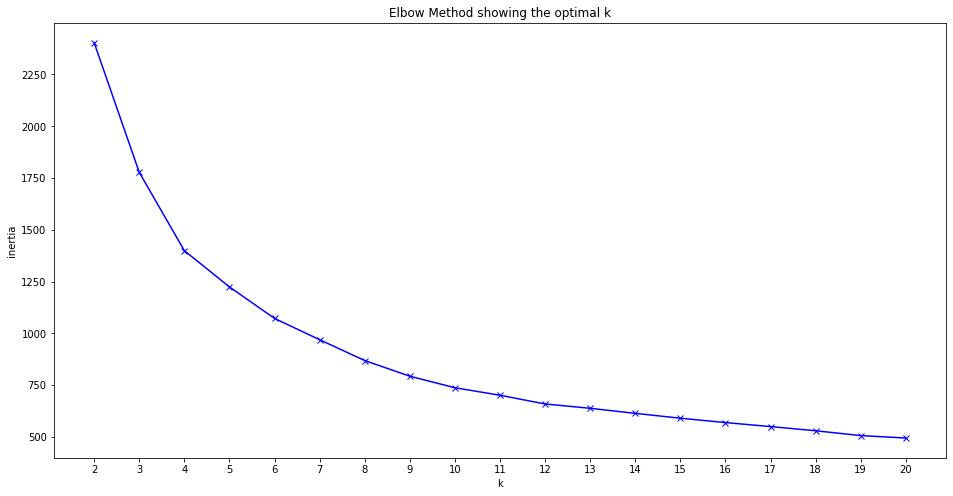

In [36]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [64]:
kmeans_3 = KMeans(n_clusters=4, random_state=1234)
kmeans_3.fit(X_scaled_df)

KMeans(n_clusters=4, random_state=1234)

In [65]:
labels = kmeans_3.labels_
labels

array([0, 0, 2, ..., 1, 1, 1])

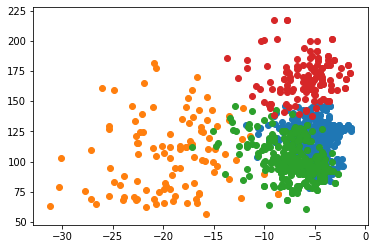

In [42]:
# assign a cluster to each example
labels = kmeans_3.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    plt.scatter(X.to_numpy()[row_ix, 1], X.to_numpy()[row_ix, 3])
    # show the plot
plt.show()

In [46]:
#pickle

In [66]:
import pickle

#scaler = StandardScaler()
#model = KMeans(n_clusters=4)

def save(kmeans_3, knn = "knn.pickle"):
    with open(knn, "wb") as f:
        pickle.dump(kmeans_3, f)

In [77]:
def save(scaler, knn = "scaler.pickle"):
    with open(knn, "wb") as f:
        pickle.dump(scaler, f)